### Find best fit line

#### Usuing manual calculations

- look at distances of points from line
- want least distances from best fit line

x^2=sum((y-y(x))/alpha)^2)

find values of m and c that minimize the residual (from y(x)= mx+c



3.056634608144114 57.40521470494953
0.059198009078874556 2.5618289818468
slope is 3.06 +/- 0.06
intercept is 57.41 +/- 2.56


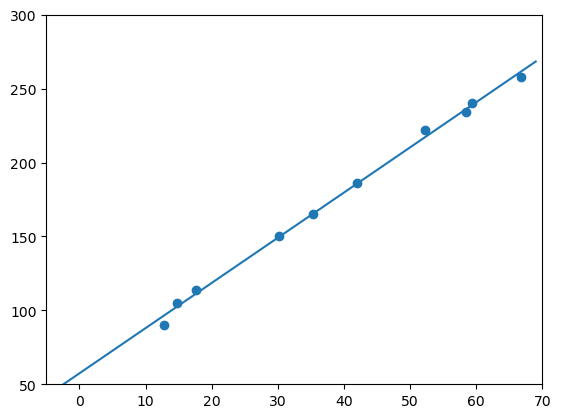

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
from scipy.optimize import curve_fit


# import x values for mass here 
x = np.array([12.8, 14.7, 17.6, 30.2, 35.3, 41.9, 52.2, 58.5, 59.4, 66.7])

# import time values here
y = np.array([90, 105, 114, 150, 165, 186, 222, 234, 240, 258])


n_data = len(x) # length of data array

# np.sum : https://numpy.org/doc/stable/reference/generated/numpy.sum.html
# e.g. np.sum(np.array([0.5, 1.5])) -> 2
delta = n_data*np.sum(x**2) - np.sum(x)**2
m = (n_data*np.sum(x*y) - np.sum(x)*np.sum(y))/delta
c = (np.sum(x**2)*np.sum(y) - np.sum(x)*np.sum(x*y))/delta

# np.sqrt : https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html
# e.g. np.sqrt([1, 4, 9]) -> ([1, 2, 3])
alpha_CU = np.sqrt((np.sum((y-m*x-c)**2))/(n_data-2))
alpha_c = alpha_CU*np.sqrt(np.sum(x**2)/delta)
alpha_m = alpha_CU*np.sqrt(n_data/delta)
#delta_prime = np.sum(w)*np.sum(w*np.square(x)) - np.sum(w*x)**2
#print(delta)

xrange = np.arange(75)-5
plt.xlim(-5,70)
plt.ylim(50,300)
plt.scatter(x,y)
plt.plot(xrange,m*xrange+c)
print(m,c)
print(alpha_m,alpha_c)
#print(alpha_CU

print(f'slope is {m:.2f} +/- {alpha_m:.2f}')
print(f'intercept is {c:.2f} +/- {alpha_c:.2f}')

### Best Fit Line
#### Using built-in methods to automatically find values


In [2]:
#np.polyfit(x,y,1,full=True)
#https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
#z, residuals, rank, singular_values, rcond = np.polyfit(x, y, 1, full=True)
z, cov = np.polyfit(x, y, 1, cov=True)
print(z)
print(cov)
delta_1 = np.sqrt(cov[0,0])
delta_2 = np.sqrt(cov[1,1])
print(delta_1)
print(delta_2)
print(f'The slope is {z[0]:.2f} +/- {delta_1:.2f}')
print(f'The intercept is {z[1]:.1f} +/- {delta_2:.1f}')

[ 3.05663461 57.4052147 ]
[[ 3.50440428e-03 -1.36426459e-01]
 [-1.36426459e-01  6.56296773e+00]]
0.05919800907887461
2.5618289818468027
The slope is 3.06 +/- 0.06
The intercept is 57.4 +/- 2.6


### Linear Fitting with Errors on the Y-axis including uncertainties


The slope is 3.06 +/- 0.17
The intercept is 57.4 +/- 7.2


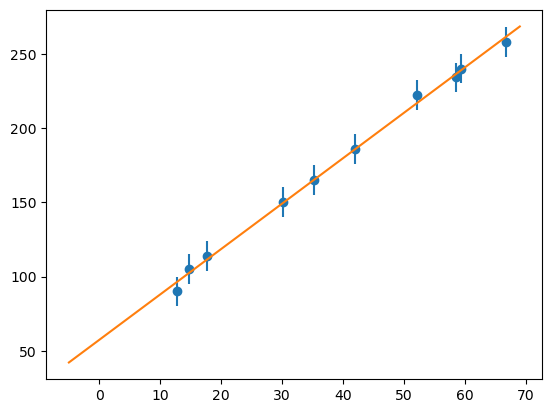

In [3]:


y_errors = 10*np.ones(n_data) # array of y uncertainties

def fitplot(x,y,y_errors):
 w = (1/np.square(y_errors))
 delta_prime = np.sum(w)*np.sum(w*np.square(x)) - np.sum(w*x)**2
 m = (np.sum(w)*np.sum(w*x*y) - np.sum(w*x)*np.sum(w*y))/delta_prime
 c = (np.sum(w*(x**2))*np.sum(w*y) - np.sum(w*x)*np.sum(w*x*y))/delta_prime
 sigma_c = np.sqrt((np.sum(w*x*x))/delta_prime)
 sigma_m = np.sqrt(np.sum(w)/delta_prime)
 return m, c, sigma_m, sigma_c

m, c, err_m, err_c = fitplot(x,y,y_errors)
#print(m,c,err_m,err_c)
print(f'The slope is {m:.2f} +/- {err_m:.2f}')
print(f'The intercept is {c:.1f} +/- {err_c:.1f}')

fig, ax = plt.subplots()
ax.errorbar(x,y,yerr=y_errors,linestyle='None')
plt.scatter(x,y)
plt.plot(xrange,m*xrange+c)

### Using Poly fit

The slope is 3.06 +/- 0.17
The intercept is 57.4 +/- 7.2


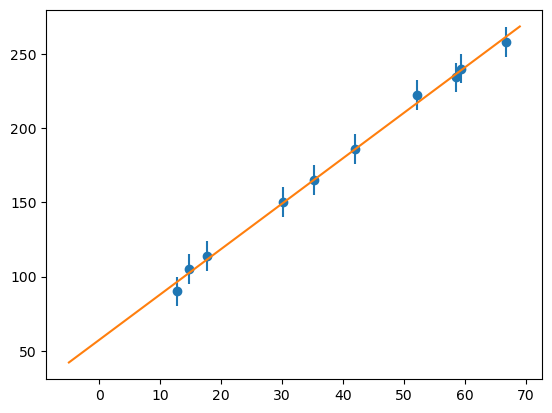

In [4]:
### same thing but using poly fit?
# define linear function (this will be the fit line algorithm)
def StraightLine(x,c,m):
    # looking for a straight line so want straight line fit
 y = c + m * x
 return y



# Save the values of curve_fit to outline and outcov
out_line,out_cov=curve_fit(StraightLine,x,y,sigma=y_errors,absolute_sigma=True)

# similar parameters as defined in np 
c_curve = out_line[0]
m_curve = out_line[1]
err_c_curve = np.sqrt(out_cov[0,0])
err_m_curve = np.sqrt(out_cov[1,1])



#print(m_curve,c_curve,err_m_curve,err_c_curve)
print(f'The slope is {m_curve:.2f} +/- {err_m_curve:.2f}')
print(f'The intercept is {c_curve:.1f} +/- {err_c_curve:.1f}')



## Plot results
fig, ax = plt.subplots()
ax.errorbar(x,y,yerr=y_errors,linestyle='None')
plt.scatter(x,y)
plt.plot(xrange,m_curve*xrange+c_curve)

### Real Data Analysis Here
1. Get data imported (probably manually)
2. Pull the errors for each Power value
3. Calculate R for each run (6 total) = -dm/dt for each run
4. Plot the $R vs P$, then find $L$
5. From that find $L$ and $P_{0}$ from $P + P_{0} = RL$, $P_{0}=$ y-intercept, and $L$ is the latent heat (**what we're trying to find**)
6. Find the total error from the measurements and the graph (using Chi squared?)


Ideas for improvements of the project
- digital multimeter and ampmeters to get more precise measurments
- better thermal isolator than the styrofoam cup
- recording time in terms of seconds instead of minutes then converting to seconds

In [5]:
# Import the data
data = np.genfromtxt('Lab heat 2 - Heat Trend.csv',delimiter=',')

runs = np.zeros((6,10,7))
# where runs[0] = run 1 and run[5] = run 6, etc.

# includes nan, so need to check for nan when looking at data
runs[0] = data[3:13]
runs[1] = data[17:27]
runs[2] = data[32:42]
runs[3] = data[47:57]
runs[4] = data[62:72]
runs[5] = data[77:87]
# all data is set now

# Pull out run 1 data and voltage values
##### RUN 1 ########
### Voltage 5V
### Amp .16A

# for run 1 power = 5*.16 = 0.8 W
run1_x = runs[0][:,4] # total time (seconds)
run1_y = runs[0][:,0] # total mass (grams)
run1_p = 5*.16 # in Watts
print('run1x',run1_x)
print('run1y',run1_y)
print('run1 power', run1_p)

##### RUN 2 ########
### Voltage 10V
### Amp .32A

run2_x = runs[1][:,4] # total time (seconds)
run2_y = runs[1][:,0] # total mass (grams)
run2_p = 10*.32 # in Watts
print('run2x',run2_x)
print('run2y',run2_y)
print('run2 power', run2_p)

##### RUN 3 ########
### Voltage 12V
### Amp .38A

run3_x = runs[2][:,4] # total time (seconds)
run3_y = runs[2][:,0] # total mass (grams)
run3_p = 12*.38 # in Watts
print('run3x',run3_x)
print('run3y',run3_y)
print('run3 power', run3_p)


##### RUN 4 ########
### Voltage 3V
### Amp .1A

run4_x = runs[3][:,4] # total time (seconds)
run4_y = runs[3][:,0] # total mass (grams)
run4_p = 3*.1 # in Watts
print('run4x',run4_x)
print('run4y',run4_y)
print('run4 power', run4_p)


##### RUN 5 ########
### Voltage 6V
### Amp .19A

run5_x = runs[4][:,4] # total time (seconds)
run5_y = runs[4][:,0] # total mass (grams)
run5_p = 6*.19 # in Watts
print('run5x',run5_x)
print('run5y',run5_y)
print('run5 power', run5_p)

##### RUN 6 ########
### Voltage 8V
### Amp .25A

run6_x = runs[5][:,4] # total time (seconds)
run6_y = runs[5][:,0] # total mass (grams)
run6_p = 8*.25 # in Watts
print('run6x',run6_x)
print('run6y',run6_y)
print('run6 power', run6_p)

run_data_x = np.array([run1_x,run2_x,run3_x,run4_x,run5_x,run6_x])
run_data_y = np.array([run1_y,run2_y,run3_y,run4_y,run5_y,run6_y])
run_data_p = np.array([run1_p,run2_p,run3_p,run4_p,run5_p,run6_p])
####### All Runs set, now plot to find R and P0?#####

run1x [  0.  93. 191. 290. 389. 496. 607. 722. 842. 964.]
run1y [280. 270. 260. 250. 240. 230. 220. 210. 200. 190.]
run1 power 0.8
run2x [  0.  83. 171. 264. 358. 454. 552. 657. 763. 872.]
run2y [280. 270. 260. 250. 240. 230. 220. 210. 200. 190.]
run2 power 3.2
run3x [  0.  78. 157. 238. 321. 407. 498. 586. 678. 772.]
run3y [300. 290. 280. 270. 260. 250. 240. 230. 220. 210.]
run3 power 4.5600000000000005
run4x [  0.  86. 176. 274. 377. 483. 594. 711. 835. 964.]
run4y [280. 270. 260. 250. 240. 230. 220. 210. 200. 190.]
run4 power 0.30000000000000004
run5x [  0.  96. 192. 293. 396. 508. 620. 738. 859. 985.]
run5y [280. 270. 260. 250. 240. 230. 220. 210. 200. 190.]
run5 power 1.1400000000000001
run6x [  0.  94. 189. 283. 387. 494. 605. 716. 832. 954.]
run6y [280. 270. 260. 250. 240. 230. 220. 210. 200. 190.]
run6 power 2.0


In [6]:
### Plot runs (dm/dt) to find R Rate of evaporation

for i in range(0,6):
    ### Find line fit
    # Save the values of curve_fit to outline and outcov

    # Error in mass measurement is +/- 3g bc smallest measurement we moved it was 10 grams?
    mass_err = 0.05
    y_errors = mass_err*np.ones(len(run_data_y[i]))
    out_line,out_cov=curve_fit(StraightLine,run_data_x[i],run_data_y[i],sigma=y_errors,absolute_sigma=False)


    # similar parameters as defined in np 
    c_curve = out_line[0]
    m_curve = out_line[1]
    err_c_curve = np.sqrt(out_cov[0,0])
    err_m_curve = np.sqrt(out_cov[1,1])



    #print(m_curve,c_curve,err_m_curve,err_c_curve)
    print(f'For Run {i+1}:')
    print(f'The power is {run_data_p[i]:.2f}')
    print(f'The slope is {m_curve:.4f} +/- {err_m_curve:.4f}')
    print(f'The intercept is {c_curve:.4f} +/- {err_c_curve:.4f}')

    ## Plot results
    fig, ax = plt.subplots()
    #ax.errorbar(run_data_x[i],run_data_y[i],yerr=y_errors,linestyle='None')
    xrange = np.arange(1000)
    plt.scatter(run_data_x[i],run_data_y[i])
    plt.plot(xrange,m_curve*xrange+c_curve, label=f'dm/dt={m_curve:.4f}+/-{err_m_curve:.4f}')
    plt.title(f'Evaporation Rate of $LN_{2}$ (Power: {run_data_p[i]:.2f}W)')
    plt.legend(loc='best')
    plt.ylabel('Mass (grams)')
    plt.xlabel('Time (Seconds)')
    plt.savefig(f'Run_{i+1}_R_calc.png')
    plt.clf()

For Run 1:
The power is 0.80
The slope is -0.0934 +/- 0.0015
The intercept is 277.8998 +/- 0.8393
For Run 2:
The power is 3.20
The slope is -0.1030 +/- 0.0014
The intercept is 277.9821 +/- 0.7250
For Run 3:
The power is 4.56
The slope is -0.1164 +/- 0.0013
The intercept is 298.4820 +/- 0.5816
For Run 4:
The power is 0.30
The slope is -0.0931 +/- 0.0020
The intercept is 276.8817 +/- 1.1177
For Run 5:
The power is 1.14
The slope is -0.0913 +/- 0.0015
The intercept is 277.8004 +/- 0.8566
For Run 6:
The power is 2.00
The slope is -0.0943 +/- 0.0015
The intercept is 277.9530 +/- 0.8034


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [147]:
### Find L and P0 (with uncertainties) by plotting R vs P plot

# get R values from previous runs
### R = -dm/dt

rVals = np.array([0.0934,0.1030,0.1164,0.0931,0.0913,0.0943])
rErr = np.array([0.0015,0.0014,0.0013,0.0020,0.0015,0.0015])
# & get power values from earlier which would be run_data_p


#####################
######## Find error bars and fit line ######## 

out_line,out_cov=curve_fit(StraightLine,run_data_p,rVals,sigma=rErr,absolute_sigma=False)

# similar parameters as defined in np 
c_curve = out_line[0]
m_curve = out_line[1]
err_c_curve = np.sqrt(out_cov[0,0])
err_m_curve = np.sqrt(out_cov[1,1])



#print(m_curve,c_curve,err_m_curve,err_c_curve)
print(f'The slope is {m_curve:.4f} +/- {err_m_curve:.4f}')
print(f'The intercept is {c_curve:.4f} +/- {err_c_curve:.4f}')

fig, ax = plt.subplots()
ax.errorbar(run_data_p,rVals,yerr=rErr,linestyle='None')
xrange = np.linspace(0,5)
plt.scatter(run_data_p,rVals)
plt.plot(xrange,m_curve*xrange+c_curve, label=f'slope={m_curve:.4f}+/-{err_m_curve:.4f}\n Int\'pt={c_curve:.4f}+/-{err_c_curve:.4f}')
plt.title(f'Evaporation Rate to Power Correlation')
plt.legend(loc='best')
plt.ylabel('Evaporation Rate (Grams/Second)')
plt.xlabel('Power (Watts)')
#plt.show()
plt.savefig(f'L_calculation.png')
plt.clf()

The slope is 0.0060 +/- 0.0010
The intercept is 0.0863 +/- 0.0028


<Figure size 640x480 with 0 Axes>

In [15]:

for i in range(0,6):
    run_x_early = runs[i][:,4][0:5] # total time (seconds)
    run_x_late = runs[i][:,4][5:10] 
    run_y_early = runs[i][:,0][0:5] # total mass (grams)
    run_y_late = runs[i][:,0][5:10] # total mass (grams)
    mass_err = 0.05
    y_errors = mass_err*np.ones(len(run_y_early))
    out_line_early,out_cov_early=curve_fit(StraightLine,run_x_early,run_y_early,sigma=y_errors,absolute_sigma=False)
    m_curve_early = out_line_early[1]
    err_m_curve_early = np.sqrt(out_cov_early[1,1])
    ### ^^^ R Early
    
    
    ### VVV R Late
    out_line_late,out_cov_late=curve_fit(StraightLine,run_x_late,run_y_late,sigma=y_errors,absolute_sigma=False)
    m_curve_late = out_line_late[1]
    err_m_curve_late = np.sqrt(out_cov_late[1,1])
    print(f'Power:{run_data_p[i]:.2f}\t R early: {m_curve_early:.4f} +/- {err_m_curve_early:.4f}\t R late: {m_curve_late:.4f} +/- {err_m_curve_late:.4f}')


[389. 496.]
Power:0.80	 R early: -0.1025 +/- 0.0007	 R late: -0.0854 +/- 0.0010
Power:3.20	 R early: -0.1114 +/- 0.0017	 R late: -0.0955 +/- 0.0011
Power:4.56	 R early: -0.1247 +/- 0.0009	 R late: -0.1099 +/- 0.0007
Power:0.30	 R early: -0.1060 +/- 0.0023	 R late: -0.0830 +/- 0.0014
Power:1.14	 R early: -0.1011 +/- 0.0010	 R late: -0.0838 +/- 0.0011
Power:2.00	 R early: -0.1038 +/- 0.0012	 R late: -0.0871 +/- 0.0010
